# 머신러닝 과정
1. 문제 정의
2. 데이터 수집
3. 데이터 전처리
4. 탐색적 데이터 분석
5. 모델 선택 및 하이퍼파라미터 조정
6. 모델 학습
7. 모델 평가

# 1. 문제 정의
- 머신러닝을 활용하여 물품 배송 데이터를 분석하고, 제 시간에 물건이 배송되었는지 예측해보자!

# 2. 데이터 수집

In [1]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 학습/검증 데이터 불러오기

In [2]:
train = pd.read_csv('./kaggle_data/Train.csv', index_col='ID')
test = pd.read_csv('./kaggle_data/test.csv', index_col='ID')

In [3]:
train

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,C,Ship,2.0,2,135,3.0,low,M,NaN,1339,1
2,F,Flight,5.0,3,225,5.0,low,F,6.0,1082,0
3,F,Ship,3.0,1,229,3.0,low,M,NaN,4971,1
4,F,Ship,3.0,2,228,NaN,medium,M,2.0,5640,0
5,D,Flight,NaN,1,195,6.0,high,F,NaN,4944,1
...,...,...,...,...,...,...,...,...,...,...,...
6995,D,Ship,4.0,2,232,5.0,medium,F,4.0,1783,0
6996,F,Ship,3.0,5,228,2.0,medium,F,NaN,5208,0
6997,D,Ship,NaN,1,300,5.0,low,F,10.0,1787,0


In [4]:
test

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
ID,,,,,,,,,,
7000,F,Ship,3.0,1,274,NaN,high,M,NaN,4352
7001,F,Ship,3.0,4,136,2.0,medium,F,NaN,1056
7002,A,Flight,NaN,5,140,3.0,low,F,7.0,5383
7003,C,Ship,NaN,1,291,4.0,low,F,NaN,1880
7004,F,?,4.0,2,147,3.0,low,F,5.0,5174
...,...,...,...,...,...,...,...,...,...,...
10995,A,?,4.0,1,204,4.0,?,F,NaN,1667
10996,C,Ship,NaN,3,195,2.0,medium,M,NaN,3869
10997,B,Flight,NaN,3,206,2.0,medium,M,7.0,4531


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  5423 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6049 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Discount_offered     3468 non-null   float64
 9   Weight_in_gms        6999 non-null   object 
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 656.2+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 7000 to 10999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      4000 non-null   object 
 1   Mode_of_Shipment     4000 non-null   object 
 2   Customer_care_calls  3144 non-null   float64
 3   Customer_rating      4000 non-null   int64  
 4   Cost_of_the_Product  4000 non-null   int64  
 5   Prior_purchases      3633 non-null   float64
 6   Product_importance   4000 non-null   object 
 7   Gender               4000 non-null   object 
 8   Discount_offered     2085 non-null   float64
 9   Weight_in_gms        4000 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 343.8+ KB


- train 결측치 : Customer_care_calls, Prior_purchases, Discount_offered 
- test 결측치 : Customer_care_calls, Prior_purchases, Discount_offered 

In [7]:
train.columns

Index(['Warehouse_block ', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [8]:
train['Warehouse_block '].unique()

array(['C', 'F', 'D', 'B', 'A'], dtype=object)

In [9]:
test['Warehouse_block '].unique()

array(['F', 'A', 'C', 'D', 'B'], dtype=object)

In [10]:
train['Mode_of_Shipment'].unique()

array([' Ship', ' Flight', ' Road', '?', ' Shipzk', ' Flightzk',
       ' Roadzk'], dtype=object)

In [11]:
test['Mode_of_Shipment'].unique()

array([' Ship', ' Flight', '?', ' Road', ' Shipzk', ' Roadzk'],
      dtype=object)

In [12]:
train['Product_importance'].unique()

array(['low', 'medium', 'high', '?', 'mediumm', 'loww', 'highh'],
      dtype=object)

In [13]:
test['Product_importance'].unique()

array(['high', 'medium', 'low', '?', 'mediumm'], dtype=object)

In [14]:
train['Gender'].unique()

array(['M', 'F'], dtype=object)

In [15]:
train['Weight_in_gms']

ID
1       1339
2       1082
3       4971
4       5640
5       4944
        ... 
6995    1783
6996    5208
6997    1787
6998    4719
6999    5097
Name: Weight_in_gms, Length: 6999, dtype: object

In [16]:
len(train['Weight_in_gms'].unique())

3332

### 칼럼 정리
- ID: 고객의 ID 번호
- Warehouse_block: 창고 블록 (A, B, C, D, F) - 범주형
- Mode_of_Shipment: 운송 방식 (Ship, Flight, Road, Shipzk, Flightzk, Roadzk, ?) - 범주형
- Customer_care_calls: 배송조회 문의전화 건수 - 이산형
- Customer_rating: 고객 평점 (1:Worst ~ 5:Best) - 순서형
- Cost_of_the_Product: 제품 비용 - 연속형
- Prior_purchases: 이전 구매 횟수 - 이산형
- Product_importance: 제품 중요도 (loww, low, medium, mediumm, high, highh, ?) - 순서형
- Gender: 성별 (M, F) - 범주형
- Discount_offered: 제공된 할인 - 연속형
- Weight_in_gms: 무게 (그램 단위) - 연속형
- Reached.on.Time_Y.N: 제 시간에 도달했는지 여부 (예상되는 예측 변수) - (0:제시간 도착 / 1:제시간 도달 못함)

# 3. 데이터 전처리


## 3-1. 범주형/순서형 변수
- 순서형 변수 : Customer_rating(고객 평점), Product_importance(제품 중요도)
- 범주형 변수 : Warehouse_block(창고 블럭), Mode_of_Shipment(운송방식), Gender(성별)
- 결측치
    - Product_importance 와 Mode_of_Shipment 는 ? 존재
- 특이점
    - Mode_of_Shipment 는 뒤에 zk가 붙은 것과 붙지 않은 것으로 나뉨
    - Product_importance 는 뒤에 스펠링이 하나씩 더 붙은 것과 붙지 않은 것으로 나뉨

### Customer_rating (고객 평점)

In [17]:
train['Customer_rating'].value_counts()

3     1451
2     1399
5     1399
1     1391
4     1357
99       2
Name: Customer_rating, dtype: int64

In [18]:
test['Customer_rating'].value_counts()

1     843
4     831
3     788
5     772
2     764
99      2
Name: Customer_rating, dtype: int64

- 99 라는 이상치 존재 (2개) -> 최빈값(3)으로 대체하자.

In [19]:
# 이상치 처리 - 최빈값으로 대체하기
def fill_rating(row):
    if row['Customer_rating']==99: # ?이면 평균으로 대체
        return 3
    else: # 아니면 그대로
        return row['Customer_rating']

In [20]:
train['Customer_rating'] = train.apply(fill_rating, axis=1)

In [21]:
test['Customer_rating'] = test.apply(fill_rating, axis=1)

<Axes: xlabel='Customer_rating', ylabel='count'>

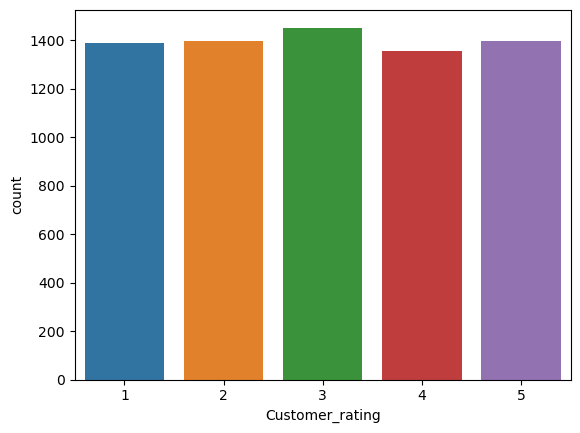

In [22]:
sns.countplot(data=train, x='Customer_rating')

### Product_importance (제품 중요도)

In [23]:
train['Product_importance'].value_counts()

low        3344
medium     2982
high        573
?            97
mediumm       1
loww          1
highh         1
Name: Product_importance, dtype: int64

In [24]:
test['Product_importance'].value_counts()

low        1873
medium     1685
high        361
?            80
mediumm       1
Name: Product_importance, dtype: int64

<Axes: xlabel='Product_importance', ylabel='count'>

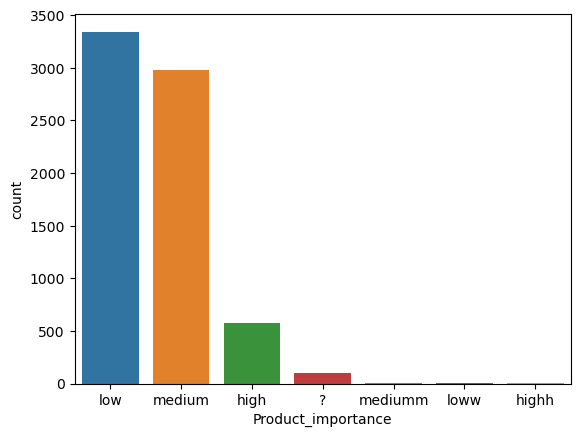

In [25]:
sns.countplot(data=train, x='Product_importance')

- mediumm, loww, highh 뒤에 한글자씩 더 잘 못 들어간 데이터 존재
- low, loww를 1, medium, mediumm을 2, high, highh를 3 으로 매핑
- ? 결측치 존재 -> 최빈값(low)으로 대체해보자.

In [26]:
mapping_importance = {
    'low': 1,
    'loww': 1,
    'medium': 2,
    'mediumm': 2,
    'high': 3,
    'highh': 3,
    '?': 1 # 결측치를 최빈값으로
}
train['Product_importance'] = train['Product_importance'].map(mapping_importance)

In [27]:
train['Product_importance'].value_counts()

1    3442
2    2983
3     574
Name: Product_importance, dtype: int64

<Axes: xlabel='Product_importance', ylabel='count'>

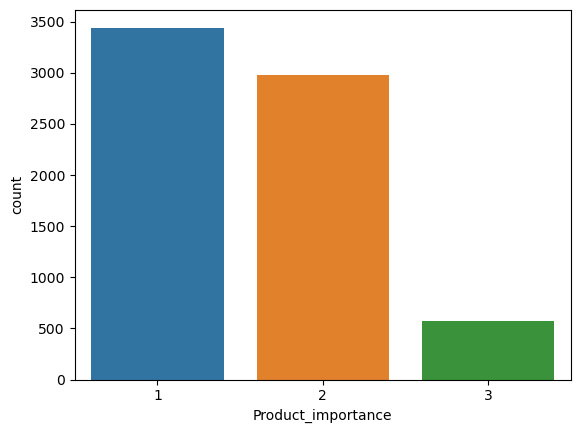

In [28]:
sns.countplot(data=train, x='Product_importance')

In [29]:
test['Product_importance'] = test['Product_importance'].map(mapping_importance)

In [30]:
test['Product_importance'].value_counts()

1    1953
2    1686
3     361
Name: Product_importance, dtype: int64

### Mode_of_Shipment (운송 방식)

In [31]:
train['Mode_of_Shipment'].value_counts()

 Ship        4508
 Road        1075
 Flight      1039
?             373
 Shipzk         2
 Flightzk       1
 Roadzk         1
Name: Mode_of_Shipment, dtype: int64

In [32]:
test['Mode_of_Shipment'].value_counts()

 Ship      2551
 Flight     631
 Road       595
?           221
 Shipzk       1
 Roadzk       1
Name: Mode_of_Shipment, dtype: int64

- 값 앞에 공백 존재 -> 공백제거하기
- 뒤에 zk 붙은 값 없애기
- ? 결측치는 Other로 대체

In [33]:
# 공백제거하기
train['Mode_of_Shipment'] = train['Mode_of_Shipment'].str.strip()
test['Mode_of_Shipment'] = test['Mode_of_Shipment'].str.strip()

In [34]:
train['Mode_of_Shipment'].value_counts()

Ship        4508
Road        1075
Flight      1039
?            373
Shipzk         2
Flightzk       1
Roadzk         1
Name: Mode_of_Shipment, dtype: int64

In [35]:
# 결측치 처리, zk붙은 거 없애기
mapping_shipment = {
    'Ship': 'Ship',
    'Shipzk': 'Ship',
    'Road': 'Road',
    'Roadzk': 'Road',
    'Flight': 'Flight',
    'Flightzk': 'Flight',
    '?': 'Other' # 결측치를 Other으로
}
train['Mode_of_Shipment'] = train['Mode_of_Shipment'].map(mapping_shipment)
test['Mode_of_Shipment'] = test['Mode_of_Shipment'].map(mapping_shipment)

In [36]:
train['Mode_of_Shipment'].value_counts()

Ship      4510
Road      1076
Flight    1040
Other      373
Name: Mode_of_Shipment, dtype: int64

In [37]:
test['Mode_of_Shipment'].value_counts()

Ship      2552
Flight     631
Road       596
Other      221
Name: Mode_of_Shipment, dtype: int64

<Axes: xlabel='Mode_of_Shipment', ylabel='count'>

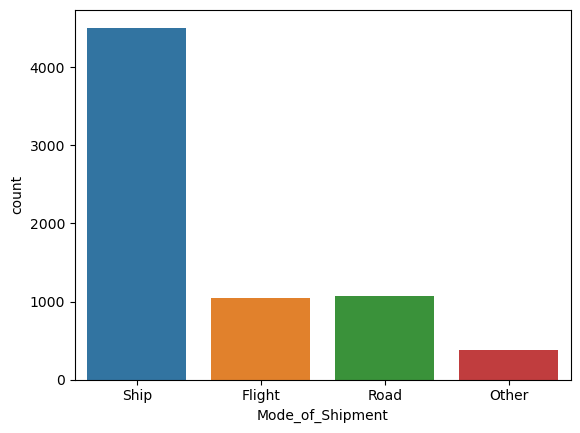

In [38]:
sns.countplot(data=train, x='Mode_of_Shipment')

### Warehouse_block (창고 블록)

In [39]:
train['Warehouse_block '].value_counts()

F    2311
C    1184
A    1174
D    1168
B    1162
Name: Warehouse_block , dtype: int64

In [40]:
test['Warehouse_block '].value_counts()

F    1355
B     671
D     666
A     659
C     649
Name: Warehouse_block , dtype: int64

<Axes: xlabel='Warehouse_block ', ylabel='count'>

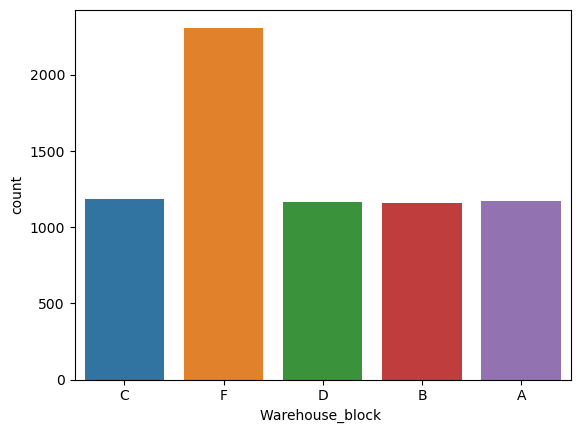

In [41]:
sns.countplot(data=train, x='Warehouse_block ')

### Gender (성별)

In [42]:
train['Gender'].value_counts()

M    3509
F    3490
Name: Gender, dtype: int64

In [43]:
test['Gender'].value_counts()

F    2055
M    1945
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

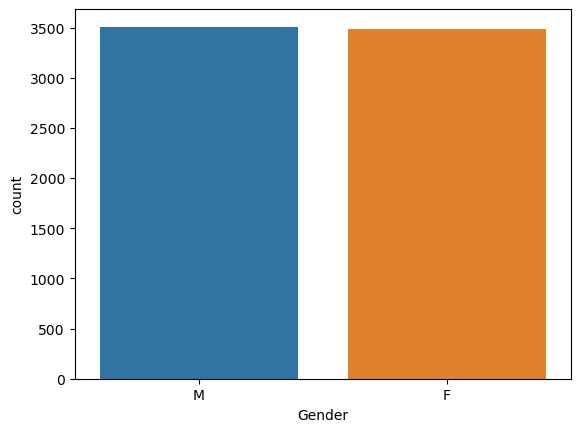

In [44]:
sns.countplot(data=train, x='Gender')

## 3-2. 수치형 변수
- 연속형 변수 : Cost_of_the_Product(제품비용), Discount_offered(제공된 할인), Weight_in_gms(무게)
- 이산형 변수 : Customer_care_calls(배송조회 문의전화 건수), Prior_purchases(이전 구매 횟수)
- 결측치 채우기
    - train 결측치 : Customer_care_calls, Prior_purchases, Discount_offered, Weight_in_gms
    - test 결측치 : Customer_care_calls, Prior_purchases, Discount_offered, Weight_in_gms
    - Weight_in_gms => object형을 int형으로 변환하기, ? 로 결측치 존재

In [45]:
# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

In [46]:
# 상관관계 확인해보기 (상관계수)
train.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.012224,0.047041,0.173709,-0.064412,-0.158465,-0.070266
Customer_rating,0.012224,1.000000,-0.003293,0.015173,0.002123,-0.016456,0.001127
Cost_of_the_Product,0.047041,-0.003293,1.000000,0.028947,0.001771,-0.139349,-0.012811
Prior_purchases,0.173709,0.015173,0.028947,1.000000,0.018181,-0.081868,-0.065160
Product_importance,-0.064412,0.002123,0.001771,0.018181,1.000000,0.029333,0.020316
Discount_offered,-0.158465,-0.016456,-0.139349,-0.081868,0.029333,1.000000,0.397393
Reached.on.Time_Y.N,-0.070266,0.001127,-0.012811,-0.065160,0.020316,0.397393,1.000000


<Axes: >

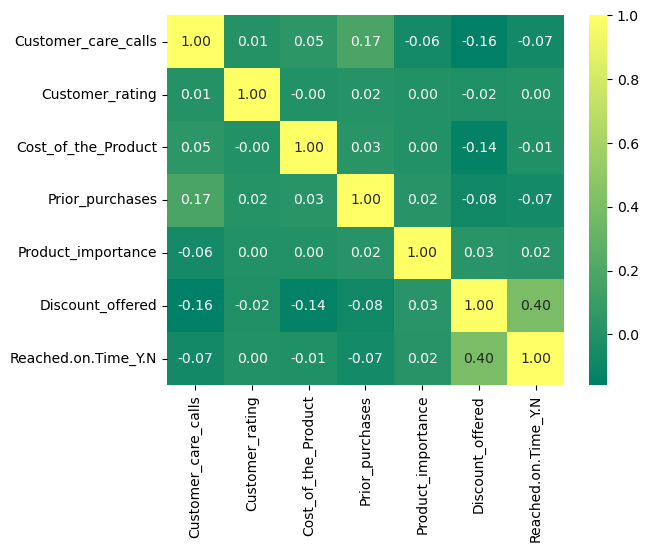

In [47]:
sns.heatmap(train.corr(), cmap='summer', annot=True, fmt='.2f')

- 정답 데이터(Reched.on.Time_Y.N)를 제외한 문제 데이터들 간의 상관성이 모두 거의 없는 것으로 보인다.

### Weight_in_gms (무게)

In [48]:
train['Weight_in_gms'].value_counts().sort_index()

1001      3
1002      1
1003      2
1005      4
1006      4
       ... 
6064      1
7401      1
7640      1
7846      1
?       446
Name: Weight_in_gms, Length: 3332, dtype: int64

In [49]:
test['Weight_in_gms'].value_counts().sort_index()

1003      1
1004      1
1005      5
1007      1
1009      4
       ... 
6000      2
6614      1
7588      1
7684      1
?       252
Name: Weight_in_gms, Length: 2452, dtype: int64

- ? 인 결측치 446개
- 결측치 처리 방법 - 평균으로 대체하기 or 중앙값으로 대체하기
    - 결측치가 꽤 있는 편이지만, 목표 변수와 상관성이 높아 보이므로, 제거는 안 해보기로 함!

In [50]:
# 결측치 제외한 무게 컬럼의 히스토그램 그려보기
notNull = train[train['Weight_in_gms'] != '?']
notNull['Weight_in_gms'] = notNull['Weight_in_gms'].astype('int64')

<Axes: xlabel='Weight_in_gms', ylabel='Count'>

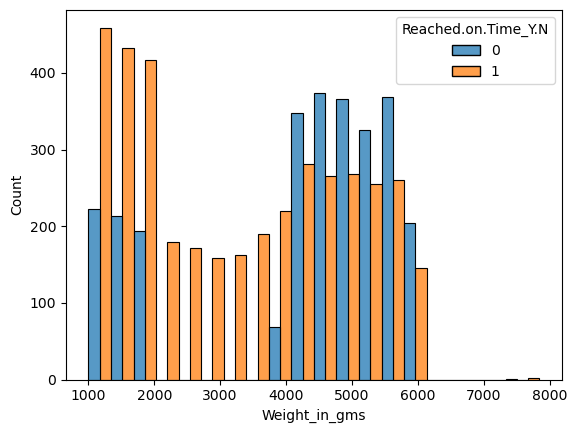

In [51]:
sns.histplot(data=notNull, x='Weight_in_gms', hue='Reached.on.Time_Y.N', multiple='dodge')

<Axes: ylabel='Weight_in_gms'>

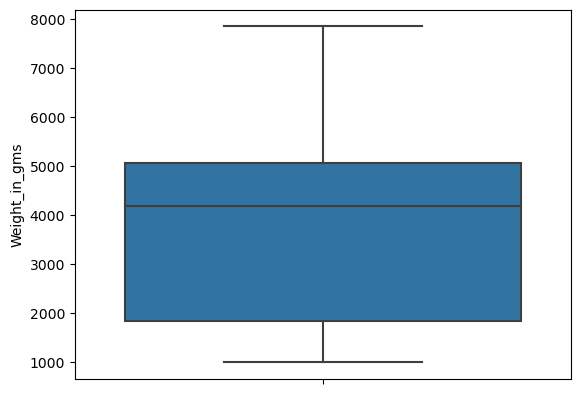

In [52]:
sns.boxplot(data=notNull, y='Weight_in_gms')

- 이상치가 존재하지 않으므로 평균으로 대체해보자.

In [53]:
# 결측치 처리 - 평균으로 대체하기
def fill_weight(row):
    if row['Weight_in_gms']=='?': # ?이면 평균으로 대체
        return notNull['Weight_in_gms'].mean()
    else: # 아니면 그대로
        return row['Weight_in_gms']

In [54]:
train['Weight_in_gms'] = train.apply(fill_weight, axis=1).astype('int64')

In [55]:
test['Weight_in_gms'] = test.apply(fill_weight, axis=1).astype('int64')

In [56]:
train['Weight_in_gms'].value_counts().sort_index()

1001    3
1002    1
1003    2
1005    4
1006    4
       ..
6000    1
6064    1
7401    1
7640    1
7846    1
Name: Weight_in_gms, Length: 3332, dtype: int64

### Customer_care_calls (배송조회 문의 건수)

In [57]:
train['Customer_care_calls'].value_counts(dropna=False).sort_index()

2.0     287
3.0    1620
4.0    1756
5.0    1147
6.0     496
7.0     117
NaN    1576
Name: Customer_care_calls, dtype: int64

In [58]:
test['Customer_care_calls'].value_counts(dropna=False).sort_index()

2.0    208
3.0    901
4.0    990
5.0    667
6.0    311
7.0     67
NaN    856
Name: Customer_care_calls, dtype: int64

- 배송조회 문의 건수 결측치 개수는 1575개
- 결측치는 문의 전화가 오지 않았다는 가정 하에 0으로 대체하자

In [59]:
train['Customer_care_calls'].fillna(0, inplace=True)
train['Customer_care_calls'].value_counts(dropna=False)

4.0    1756
3.0    1620
0.0    1576
5.0    1147
6.0     496
2.0     287
7.0     117
Name: Customer_care_calls, dtype: int64

In [60]:
test['Customer_care_calls'].fillna(0, inplace=True)
test['Customer_care_calls'].value_counts(dropna=False)

4.0    990
3.0    901
0.0    856
5.0    667
6.0    311
2.0    208
7.0     67
Name: Customer_care_calls, dtype: int64

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  6999 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6049 non-null   float64
 6   Product_importance   6999 non-null   int64  
 7   Gender               6999 non-null   object 
 8   Discount_offered     3468 non-null   float64
 9   Weight_in_gms        6999 non-null   int64  
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 656.2+ KB


<Axes: xlabel='Customer_care_calls', ylabel='count'>

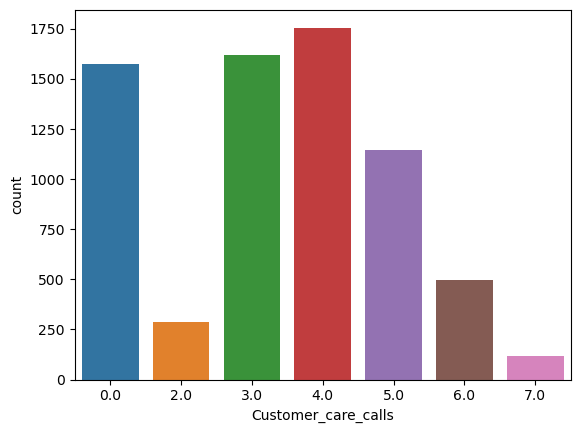

In [62]:
sns.countplot(data=train, x='Customer_care_calls')

### Prior_purchases (이전 구매 횟수)

In [63]:
train['Prior_purchases'].value_counts(dropna=False).sort_index()

2.0     1423
3.0     2176
4.0     1162
5.0      735
6.0      310
7.0       70
8.0       72
10.0     101
NaN      950
Name: Prior_purchases, dtype: int64

In [64]:
test['Prior_purchases'].value_counts(dropna=False).sort_index()

2.0      866
3.0     1293
4.0      723
5.0      414
6.0      184
7.0       53
8.0       44
10.0      56
NaN      367
Name: Prior_purchases, dtype: int64

- 이전 구매횟수의 결측치 개수는 950개
- 이전에 구매한 적이 없는 걸까, 누락된 걸까?
- 이전에 구매한 적이 없다는 가정 하에 0으로 대체하자.

In [65]:
train['Prior_purchases'].fillna(0, inplace=True)
train['Prior_purchases'].value_counts(dropna=False)

3.0     2176
2.0     1423
4.0     1162
0.0      950
5.0      735
6.0      310
10.0     101
8.0       72
7.0       70
Name: Prior_purchases, dtype: int64

In [66]:
test['Prior_purchases'].fillna(0, inplace=True)
test['Prior_purchases'].value_counts(dropna=False)

3.0     1293
2.0      866
4.0      723
5.0      414
0.0      367
6.0      184
10.0      56
7.0       53
8.0       44
Name: Prior_purchases, dtype: int64

<Axes: xlabel='Prior_purchases', ylabel='count'>

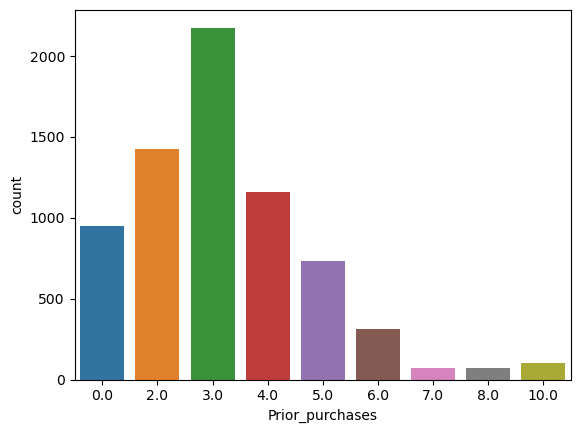

In [67]:
sns.countplot(data=train, x='Prior_purchases')

### Discount_offered (제공되는 할인)

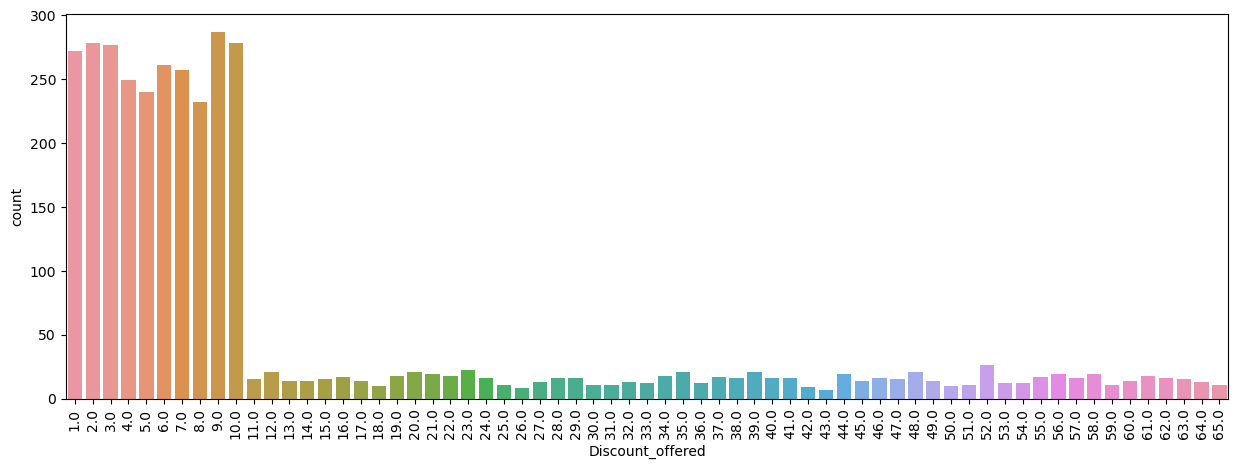

In [68]:
plt.figure(figsize=(15,5))
sns.countplot(data=train, x='Discount_offered')
plt.xticks(rotation=90)
plt.show()

In [69]:
train['Discount_offered'].value_counts(dropna=False)

NaN     3531
9.0      287
10.0     278
2.0      278
3.0      277
        ... 
50.0      10
18.0      10
42.0       9
26.0       8
43.0       7
Name: Discount_offered, Length: 66, dtype: int64

In [70]:
test['Discount_offered'].value_counts(dropna=False)

NaN     1915
3.0      171
7.0      170
5.0      169
6.0      166
        ... 
55.0       4
30.0       4
58.0       4
34.0       3
65.0       2
Name: Discount_offered, Length: 66, dtype: int64

- 제공되는 할인의 결측치 개수는 3531개로, 반 이상인 것을 확인할 수 있다.
- 할인과 목표변수가 관계가 있을까?

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Discount_offered'>

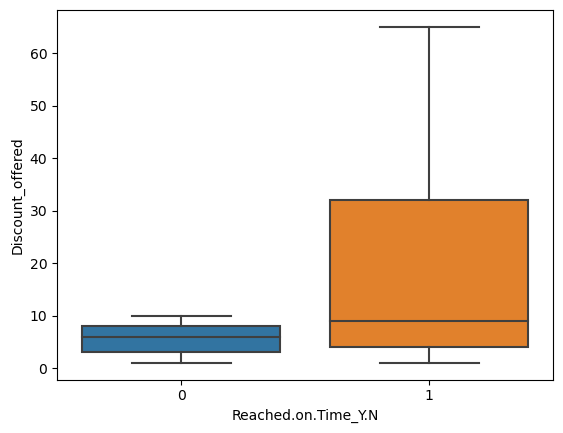

In [71]:
sns.boxplot(data=train, x='Reached.on.Time_Y.N', y='Discount_offered')

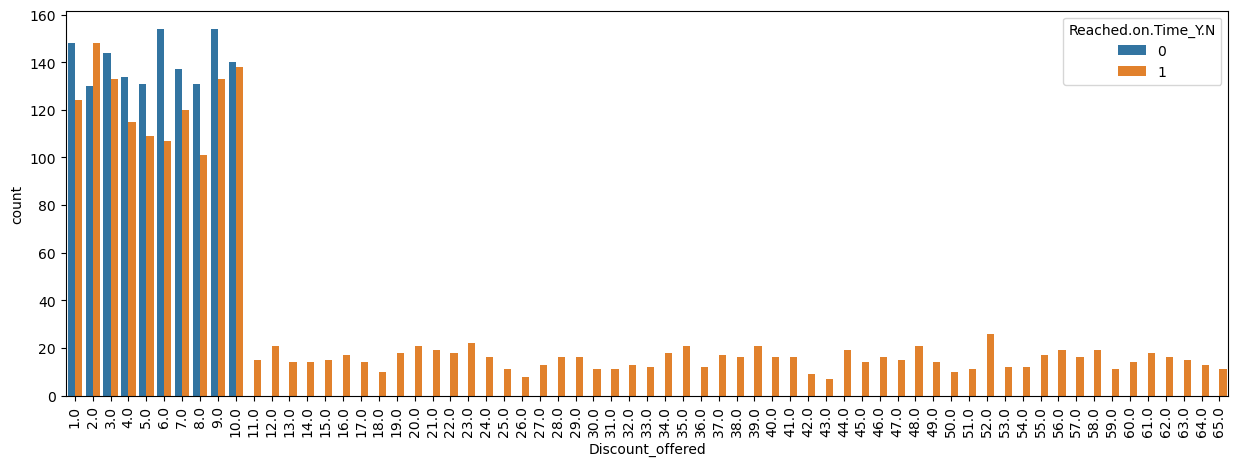

In [72]:
plt.figure(figsize=(15,5))
sns.countplot(data=train, x='Discount_offered', hue='Reached.on.Time_Y.N')
plt.xticks(rotation=90)
plt.show()

In [73]:
# 제시간에 도착한 경우 개수
train[train['Reached.on.Time_Y.N']==0]['Discount_offered'].count()

1403

In [74]:
# 제공되는 할인이 10이하이면서 제시간에 도착하지 못한 경우 개수
train[(train['Reached.on.Time_Y.N']==1) & (train['Discount_offered']<=10.0)]['Discount_offered'].count()

1228

- 제공되는 할인이 10보다 큰 경우에는 모두 제시간에 도착하지 못했다.
- 제공되는 할인이 10이하일 경우에는 제시간에 도착한 경우(1403개)와 제시간에 도착하지 못한 경우(1228개)가 비슷하다.

- 제공되는 할인을 할인이 없다는 가정 하에 0으로 대체하는 게 나을까, 목표변수 결과에 따른 평균값으로 대체하는 게 나을까, 중앙값으로 대체하는 게 나을까?
- 결측치가 반 이상이므로 제거하는 게 나을까?

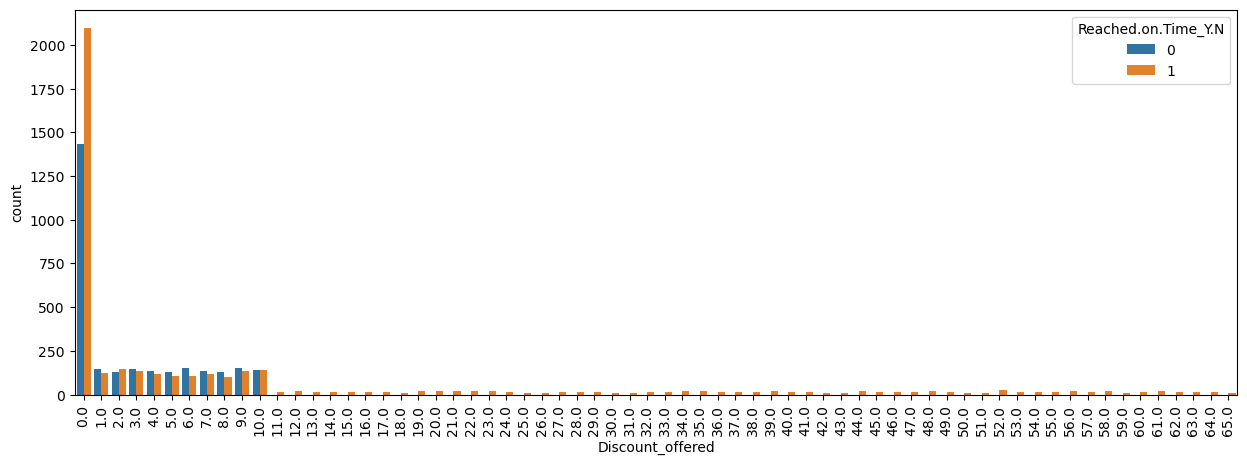

In [75]:
# 제공되는 할인이 없다는 가정 하에 0으로 대체하자.
train['Discount_offered'].fillna(0, inplace=True)
test['Discount_offered'].fillna(0, inplace=True)

plt.figure(figsize=(15,5))
sns.countplot(data=train, x='Discount_offered', hue='Reached.on.Time_Y.N')
plt.xticks(rotation=90)
plt.show()

- 할인이 10보다 큰 경우와 그렇지 않은 경우로 나누는 것은 어떨까? ************************

### Cost_of_the_Product (제품 비용)

In [76]:
train['Cost_of_the_Product'].value_counts().sort_index()

96       3
97       1
98      10
99       3
100      6
        ..
307     10
308     13
309      8
310     11
9999     3
Name: Cost_of_the_Product, Length: 216, dtype: int64

In [77]:
test['Cost_of_the_Product'].value_counts().sort_index()

96      2
97      6
98      4
99      2
100     3
       ..
307     4
308     7
309     7
310     6
9999    1
Name: Cost_of_the_Product, Length: 215, dtype: int64

<Axes: xlabel='Cost_of_the_Product'>

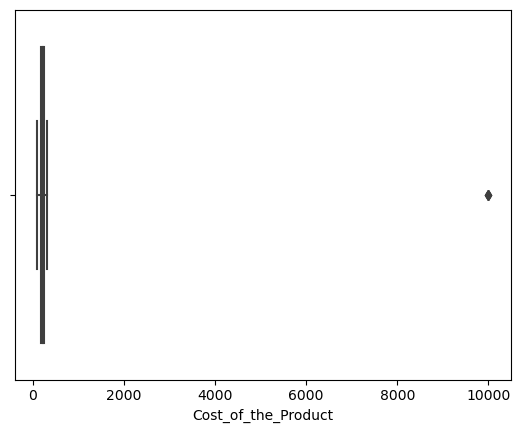

In [78]:
sns.boxplot(data=train, x='Cost_of_the_Product')

- 이상치(9999) 3개 존재한다.
- 처리 방법
    1. 제거한다.
    2. 결측치를 제외한 평균값으로 대체한다.
    - => 평균으로 대체해보자.

In [79]:
train[train['Cost_of_the_Product']==9999]

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
112,C,Ship,3.0,2,9999,4.0,2,F,0.0,1322,1
6256,B,Ship,2.0,2,9999,4.0,2,M,0.0,4066,0
6613,F,Flight,4.0,4,9999,3.0,2,F,0.0,5555,1


In [80]:
not9999 = train[train['Cost_of_the_Product']!=9999]

In [81]:
# 이상치 처리 - 평균으로 대체하기
def fill_cost(row):
    if row['Cost_of_the_Product']==9999: # 9999이면 평균으로 대체
        return not9999['Cost_of_the_Product'].mean()
    else: # 아니면 그대로
        return row['Cost_of_the_Product']

In [82]:
train['Cost_of_the_Product'] = train.apply(fill_cost, axis=1).astype('int64')

In [83]:
test['Cost_of_the_Product'] = test.apply(fill_cost, axis=1).astype('int64')

<Axes: xlabel='Cost_of_the_Product'>

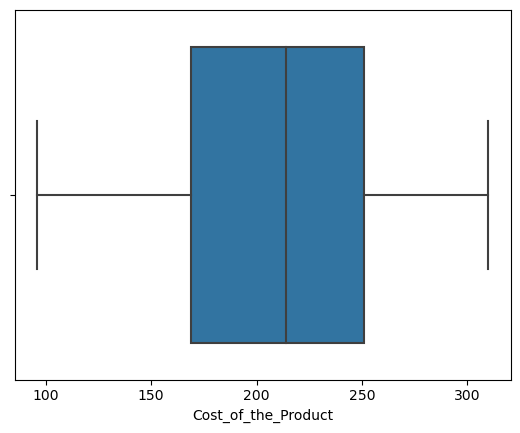

In [84]:
sns.boxplot(data=train, x='Cost_of_the_Product')

# 4. 탐색적 데이터 분석 (EDA)

### 원 핫 인코딩

In [85]:
train.columns

Index(['Warehouse_block ', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [86]:
cat_feature = ['Warehouse_block ', 'Mode_of_Shipment','Gender'] # 범주형 변수

In [87]:
# 원 핫 인코딩 진행 
for cat_name in cat_feature:
    dummy = pd.get_dummies(train[cat_name], prefix = cat_name)
    train = pd.concat([train, dummy], axis = 1)
    train.drop(cat_name, axis = 1, inplace=True)

In [88]:
for cat_name in cat_feature:
    dummy = pd.get_dummies(test[cat_name], prefix = cat_name)
    test = pd.concat([test, dummy], axis = 1)
    test.drop(cat_name, axis = 1, inplace=True)

In [89]:
train

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block _A,Warehouse_block _B,Warehouse_block _C,Warehouse_block _D,Warehouse_block _F,Mode_of_Shipment_Flight,Mode_of_Shipment_Other,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_F,Gender_M
ID,,,,,,,,,,,,,,,,,,,
1,2.0,2,135,3.0,1,0.0,1339,1,0,0,1,0,0,0,0,0,1,0,1
2,5.0,3,225,5.0,1,6.0,1082,0,0,0,0,0,1,1,0,0,0,1,0
3,3.0,1,229,3.0,1,0.0,4971,1,0,0,0,0,1,0,0,0,1,0,1
4,3.0,2,228,0.0,2,2.0,5640,0,0,0,0,0,1,0,0,0,1,0,1
5,0.0,1,195,6.0,3,0.0,4944,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,4.0,2,232,5.0,2,4.0,1783,0,0,0,0,1,0,0,0,0,1,1,0
6996,3.0,5,228,2.0,2,0.0,5208,0,0,0,0,0,1,0,0,0,1,1,0
6997,0.0,1,300,5.0,1,10.0,1787,0,0,0,0,1,0,0,0,0,1,1,0


In [90]:
test

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Warehouse_block _A,Warehouse_block _B,Warehouse_block _C,Warehouse_block _D,Warehouse_block _F,Mode_of_Shipment_Flight,Mode_of_Shipment_Other,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_F,Gender_M
ID,,,,,,,,,,,,,,,,,,
7000,3.0,1,274,0.0,3,0.0,4352,0,0,0,0,1,0,0,0,1,0,1
7001,3.0,4,136,2.0,2,0.0,1056,0,0,0,0,1,0,0,0,1,1,0
7002,0.0,5,140,3.0,1,7.0,5383,1,0,0,0,0,1,0,0,0,1,0
7003,0.0,1,291,4.0,1,0.0,1880,0,0,1,0,0,0,0,0,1,1,0
7004,4.0,2,147,3.0,1,5.0,5174,0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,4.0,1,204,4.0,1,0.0,1667,1,0,0,0,0,0,1,0,0,1,0
10996,0.0,3,195,2.0,2,0.0,3869,0,0,1,0,0,0,0,0,1,0,1
10997,0.0,3,206,2.0,2,7.0,4531,0,1,0,0,0,1,0,0,0,0,1


### 학습/검증 데이터 분리

In [91]:
X_train = train.drop('Reached.on.Time_Y.N', axis=1)
y_train = train['Reached.on.Time_Y.N']
X_test = test

### 스케일링

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
ss_scaler = StandardScaler() # 스케일링 객체 생성
ss_scaler.fit(X_train)
ss_X_train = ss_scaler.transform(X_train)
ss_X_test = ss_scaler.transform(X_test)

### 모델링

In [94]:
# 모델 import
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [95]:
# XG boost 사용하기
xgb_ta01 = XGBClassifier(n_estimators = 100, random_state = 11)
xgb_ta01

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=11, ...)

In [96]:
from sklearn.model_selection import cross_val_score

In [97]:
# 교차검증
result = cross_val_score(xgb_ta01, X_train, y_train, cv=5)
print(result)
print(result.mean())

[0.63357143 0.65285714 0.64642857 0.64642857 0.67047891]
0.6499529255590728


In [98]:
# lightGBM 사용해보기
lgbm_ta01 = LGBMClassifier(n_estimators=100, random_state = 11)
lgbm_ta01

LGBMClassifier(random_state=11)

In [99]:
# 교차검증
result = cross_val_score(lgbm_ta01, X_train, y_train, cv=5)
print(result)
print(result.mean())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 578
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col

In [100]:
lgbm_ta01.fit(X_train, y_train)
pre = lgbm_ta01.predict(X_test)

omr = pd.read_csv('./kaggle_data/sampleSubmission.csv')
omr['Reached.on.Time_Y.N'] = pre
omr.to_csv('lgbm_ta01.csv', index=False)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4162, number of negative: 2837
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 6999, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594656 -> initscore=0.383249
[LightGBM] [Info] Start training from score 0.383249


### 그리드 서치

In [101]:
# 그리드 서치 모듈 불러오기
from sklearn.model_selection import GridSearchCV

**RandomForest**

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rf_model = RandomForestClassifier()

In [104]:
# 랜덤 포레스트의 하이퍼 파라미터 조합식 짜주기
param_grid = {
    'n_estimators' : [200, 400, 600, 800, 1000],
    'max_depth' : range(1, 6, 1),
    'min_samples_split' : range(2, 11, 2)
}

In [105]:
grid_search_rf = GridSearchCV(rf_model, param_grid=param_grid, cv=5)

In [ ]:
grid_search_rf.fit(X_train, y_train) # 그리드 서치 학습

In [ ]:
grid_search_rf.best_score_

In [ ]:
best_tree = grid_search_rf.best_estimator_

In [ ]:
best_tree.fit(X_train, y_train)

In [ ]:
pre = best_tree.predict(X_test)

In [ ]:
omr['Reached.on.Time_Y.N'] = pre
omr.to_csv('test.csv', index=False)